# Titanic Survivorship Data Analysis
### Alex Petrallo

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [5]:
titanic_df = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [6]:
titanic_df.Sex = titanic_df.Sex.map(dict(male=1, female=0))
titanic_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [7]:
titanic_df.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

Text(0, 0.5, 'Outcomes')

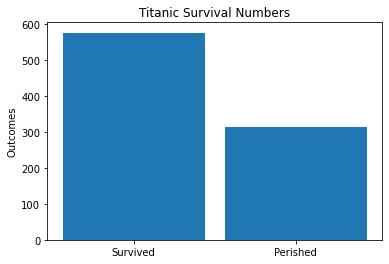

In [8]:
counts = titanic_df.Sex.value_counts()

w = 0.35  
plt.bar(x=[0,.4], height=counts, width = w)
plt.xticks([0,.4], ('Survived', 'Perished'))

plt.title('Titanic Survival Numbers')
plt.ylabel('Outcomes')

In [9]:
feature_list = ['Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [10]:
death_features = []
for feature in feature_list:
    death_features.append(titanic_df.groupby('Survived', as_index=False)[feature].mean().iloc[0,1])
death_features

[0.8524590163934426,
 2.5318761384335153,
 30.62617924528302,
 0.5537340619307832,
 0.3296903460837887,
 22.117886885245877]

In [11]:
surv_features = []
for feature in feature_list:
    surv_features.append(titanic_df.groupby('Survived', as_index=False)[feature].mean().iloc[1,1])
surv_features

[0.31871345029239767,
 1.9502923976608186,
 28.343689655172415,
 0.47368421052631576,
 0.4649122807017544,
 48.39540760233917]

In [12]:
all_features = []
for feature in feature_list:
    all_features.append(titanic_df[feature].mean())
all_features 

[0.6475869809203143,
 2.308641975308642,
 29.69911764705882,
 0.5230078563411896,
 0.38159371492704824,
 32.204207968574636]

([<matplotlib.axis.XTick at 0x2065f993910>,
 [Text(0, 0, 'Sex'),
  Text(1, 0, 'Pclass'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'SibSp'),
  Text(4, 0, 'Parch'),
  Text(5, 0, 'Fare')])

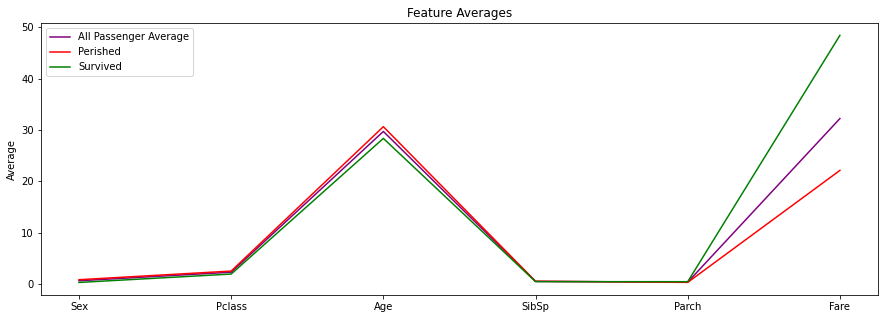

In [13]:
plt.figure(figsize=(15,5))
plt.plot(all_features, label = 'All Passenger Average', c = 'purple')
plt.plot(death_features, label = 'Perished', c = 'r')
plt.plot(surv_features, label = 'Survived', c = 'g')
plt.legend()
plt.ylabel('Average')
plt.title('Feature Averages')

x_values = np.arange(0, len(feature_list), 1) 
plt.xticks(x_values, feature_list)

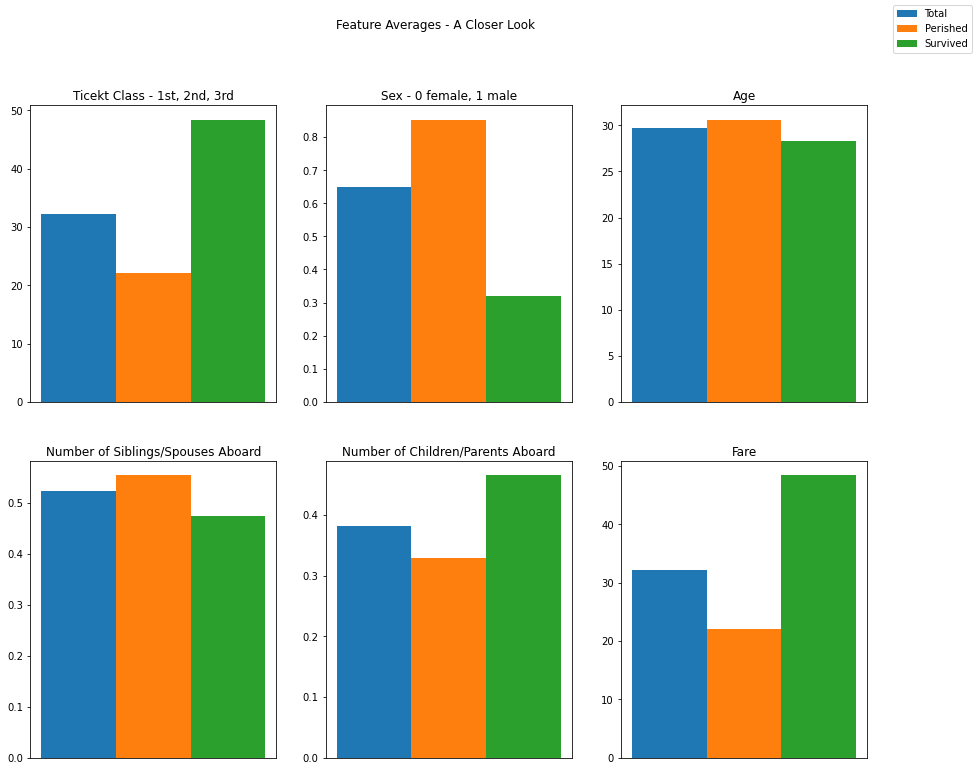

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,12))
samples = np.arange(1,892)
w = .5
ax[0,0].bar(x = 0, height = all_features[-1], width = w, label = 'Total')
ax[0,0].bar(x = .5, height = death_features[-1], width = w, label = 'Perished')
ax[0,0].bar(x = 1, height = surv_features[-1], width = w, label = 'Survived')
ax[0,0].set_title('Ticekt Class - 1st, 2nd, 3rd')
ax[0,0].axes.xaxis.set_visible(False)

ax[0,1].bar(x = 0, height = all_features[0], width = w)
ax[0,1].bar(x = .5, height = death_features[0], width = w)
ax[0,1].bar(x = 1, height = surv_features[0], width = w)
ax[0,1].set_title('Sex - 0 female, 1 male')
ax[0,1].axes.xaxis.set_visible(False)

ax[0,2].bar(x = 0, height = all_features[2], width = w)
ax[0,2].bar(x = .5, height = death_features[2], width = w)
ax[0,2].bar(x = 1, height = surv_features[2], width = w)
ax[0,2].set_title('Age')
ax[0,2].axes.xaxis.set_visible(False)

ax[1,0].bar(x = 0, height = all_features[3], width = w)
ax[1,0].bar(x = .5, height = death_features[3], width = w)
ax[1,0].bar(x = 1, height = surv_features[3], width = w)
ax[1,0].set_title('Number of Siblings/Spouses Aboard')
ax[1,0].axes.xaxis.set_visible(False)

ax[1,1].bar(x = 0, height = all_features[4], width = w)
ax[1,1].bar(x = .5, height = death_features[4], width = w)
ax[1,1].bar(x = 1, height = surv_features[4], width = w)
ax[1,1].set_title('Number of Children/Parents Aboard')
ax[1,1].axes.xaxis.set_visible(False)

ax[1,2].bar(x = 0, height = all_features[5], width = w)
ax[1,2].bar(x = .5, height = death_features[5], width = w)
ax[1,2].bar(x = 1, height = surv_features[5], width = w)
ax[1,2].set_title('Fare')
ax[1,2].axes.xaxis.set_visible(False)

fig.suptitle('Feature Averages - A Closer Look')
fig.legend()


In [15]:
titanic_df.corr()['Survived']

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

In [16]:
groups = titanic_df.groupby("Survived")
surv = groups.get_group(1)
perished = groups.get_group(0)

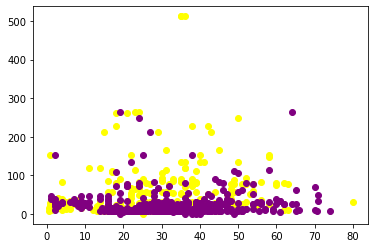

In [18]:
plt.scatter(surv.Age, surv.Fare, c= 'yellow')
plt.scatter(perished.Age, perished.Fare, c= 'purple')